# DICODING SUBMISSION

## Rock Paper Scissors Classifier

**Name : Idris Darmawan Pane**

**Email : panedeniro0@gmail.com**

Dicoding profile : https://www.dicoding.com/users/blacksaga21

In [ ]:
#Import tensorflow
import tensorflow as tf

In [ ]:
!wget --no-check-certificate https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-07-02 01:54:41--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  8.32MB/s    in 46s     

2021-07-02 01:55:28 (6.63 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



**1. EXTRACTIG/UNZIP THE ZIP FILE**

In [ ]:
import zipfile,os
local_zip = "rockpaperscissors.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/tmp/")
zip_ref.close()

**2. SPLIT THE DATASET USING PYTHON LIBRARY SPLIT-FOLDER**

**Training = 60% and Validation = 40%**

In [ ]:
!pip install split-folders
import splitfolders

In [ ]:
splitfolders.ratio("/tmp/rockpaperscissors/rps-cv-images", output="/tmp/rockpaperscissors/split", seed=1337, ratio=(0.6, 0.4))

Copying files: 2188 files [00:00, 4285.47 files/s]


**3. THE DIRECTORY**

In [ ]:
base_dir = '/tmp/rockpaperscissors/split'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
os.listdir(base_dir)

['val', 'train']

In [ ]:
#Directory for training
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')

#Directory for validation
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

**4. IMAGE OVERVIEW**

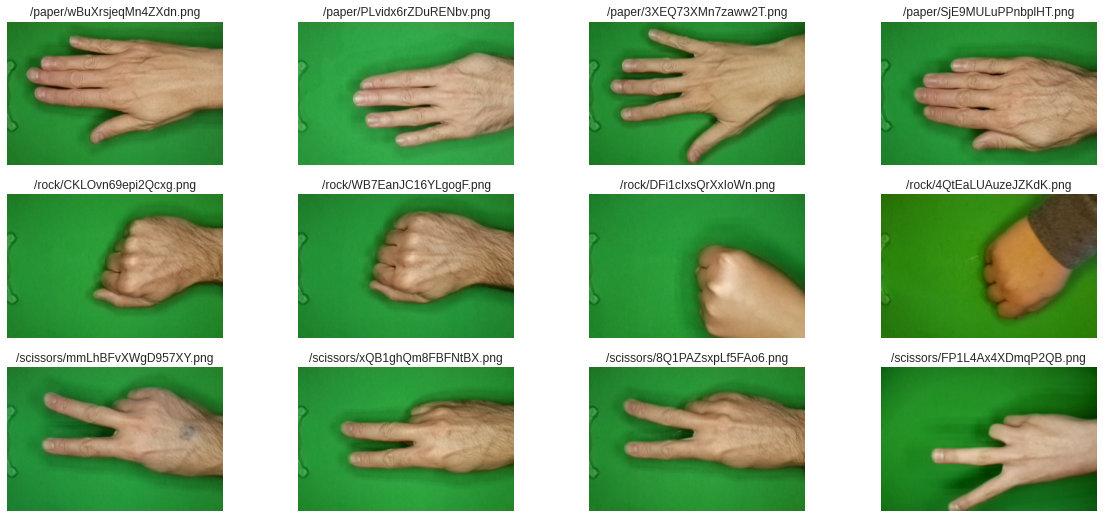

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as plt_image
plt.style.use("seaborn")
total = 4                                                                       
index = np.random.randint(20)                                                    

plt.figure(figsize=(5*total, 9))

list_paper = [os.path.join('/tmp/rockpaperscissors/paper', name) for name in os.listdir('/tmp/rockpaperscissors/paper')[index:index+total]]
list_rock = [os.path.join('/tmp/rockpaperscissors/rock', name) for name in os.listdir('/tmp/rockpaperscissors/rock')[index:index+total]]
list_scissors = [os.path.join('/tmp/rockpaperscissors/scissors', name) for name in os.listdir('/tmp/rockpaperscissors/scissors')[index:index+total]]

for i, path in enumerate(list_paper+list_rock+list_scissors):
  plt.subplot(3, total, i+1)
  plt.axis('off')

  plt.title(path.replace('/tmp/rockpaperscissors', ''))
  img = plt_image.imread(path)
  plt.imshow(img)

**5. IMAGE DATA GENERATOR**

In [ ]:
from tensorflow.keras.preprocessing.image import  ImageDataGenerator

In [ ]:
#Load training data
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.15,
                    width_shift_range=2.0,
                    height_shift_range=2.0,
                    fill_mode = 'nearest')

#Load testing data
test_datagen = ImageDataGenerator(
                    rescale=1./255
                    )

In [ ]:
train_gen = train_datagen.flow_from_directory(
        train_dir,  # Training Directory
        target_size=(150, 150),  # Changing The Picture Resolution
        batch_size=128,
        # Multiclass problem, so i'm using "categorical" class mode
        class_mode='categorical')
 
val_gen = test_datagen.flow_from_directory(
        validation_dir, # Validation Directory
        target_size=(150, 150), # Changing the picture resolution
        batch_size=128, # Multiclass problem, so i'm using "categorical" class mode
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


**6. USING CALLBACKS**

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get("accuracy")>=0.99):
      print("\nAccuracy has reached 99%, training stop!")
      self.model.stop_training=True

In [ ]:
callbacks = myCallback()

**7. INITIALISING SEQUENTIAL MODEL AND ADDING LAYERS**

In [ ]:
model = tf.keras.models.Sequential([
    #First Convolution Layer                                
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu", input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    #Second Convolution Layer
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    #Third Convolution layer
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    #Fourth convolution Layer
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    #First Hidden layers
    tf.keras.layers.Dense(128, activation="relu"),
    #Second Hidden Layers
    tf.keras.layers.Dense(512, activation="relu"),
    
    #Output Layer
    tf.keras.layers.Dense(3, activation="softmax"),
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

**8. MODEL COMPILING**

In [ ]:
model.compile(optimizer='adamax',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

**9. MODEL TRAINING**

In [ ]:
history = model.fit(
    train_gen,
    epochs=50,
    validation_data=val_gen,
    verbose=2,
    callbacks=[callbacks]
)

Epoch 1/50
11/11 - 44s - loss: 1.0915 - accuracy: 0.3742 - val_loss: 1.0681 - val_accuracy: 0.3630
Epoch 2/50
11/11 - 10s - loss: 0.9796 - accuracy: 0.5114 - val_loss: 0.7463 - val_accuracy: 0.7158
Epoch 3/50
11/11 - 10s - loss: 0.6450 - accuracy: 0.7492 - val_loss: 0.4607 - val_accuracy: 0.8470
Epoch 4/50
11/11 - 10s - loss: 0.4961 - accuracy: 0.8216 - val_loss: 0.3901 - val_accuracy: 0.8447
Epoch 5/50
11/11 - 10s - loss: 0.3855 - accuracy: 0.8521 - val_loss: 0.2992 - val_accuracy: 0.8904
Epoch 6/50
11/11 - 10s - loss: 0.3298 - accuracy: 0.8636 - val_loss: 0.2020 - val_accuracy: 0.9338
Epoch 7/50
11/11 - 10s - loss: 0.2857 - accuracy: 0.9047 - val_loss: 0.2342 - val_accuracy: 0.9201
Epoch 8/50
11/11 - 10s - loss: 0.2376 - accuracy: 0.9154 - val_loss: 0.1939 - val_accuracy: 0.9384
Epoch 9/50
11/11 - 10s - loss: 0.2019 - accuracy: 0.9314 - val_loss: 0.2151 - val_accuracy: 0.9304
Epoch 10/50
11/11 - 10s - loss: 0.2356 - accuracy: 0.9177 - val_loss: 0.1459 - val_accuracy: 0.9543
Epoch 11/

**10. SHOWING TRAINING AND VALIDATION ACCURACY USING MATPLOTLIB**

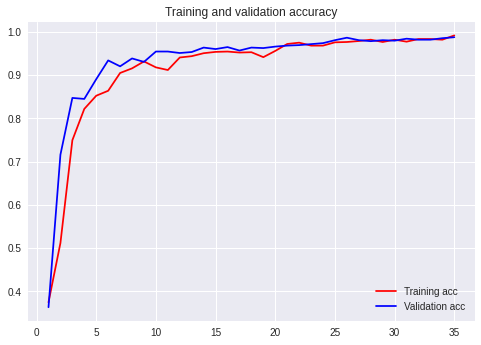

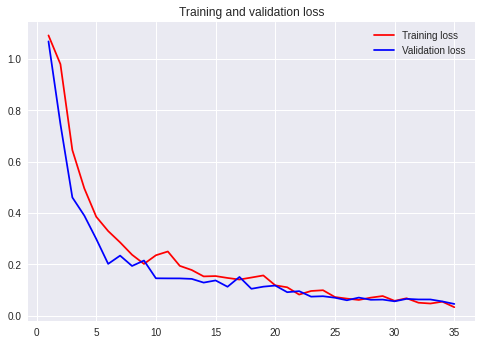

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**11. MODEL PREDICTION**

Saving Rock-paper-scissors_(paper).png to Rock-paper-scissors_(paper).png
Rock-paper-scissors_(paper).png
paper


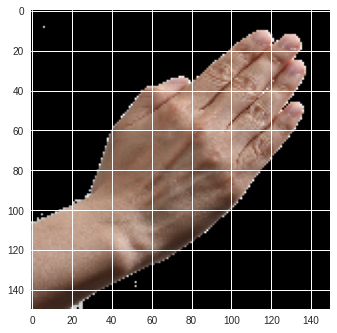

In [ ]:
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')

**12. EXPORTING TO TFLITE**